In [1]:
import pylab

import simulationRunner

#continuous modules
import continuous.link
import continuous.originNode
import continuous.destinationNode
import continuous.mergeNode
import continuous.oneToOneNode
import continuous.divergeNode

import discrete.link
import discrete.originNode
import discrete.destinationNode
import discrete.oneToOneNode
import discrete.divergeNode
import discrete.mergeNode
import trip

import discrete.matsimLink

# One to One Case

In [2]:
after_dem = 0.2
demands_one_one = [1.0, 1.0, 1.0, 1.0, 1.0]
demands_one_one.extend([after_dem for _ in range(10)])

total_time = 150
def run_continuous(time_step):
    inbound_link = continuous.link.Link(length=150, vf=30.0, w=6.0, kj=0.2)
    outbound_link = continuous.link.Link(length=150, vf=30.0, w=6.0, kj=0.1)

    #demands = [1.0, 0.4, 0.3]
    origin_node = continuous.originNode.OriginNode(1, inbound_link, demands_one_one)
    oneOneNode = continuous.oneToOneNode.OneToOneNode(2, inbound_link, outbound_link)
    destination_node = continuous.destinationNode.DestinationNode(3, outbound_link)

    links = [inbound_link, outbound_link]
    nodes = [origin_node, oneOneNode, destination_node]

    sim = simulationRunner.SimulationRunner(links = links, nodes = nodes, time_step = time_step, total_time=total_time)
    sim.run()
    return sim

def run_discrete(time_step):
    inbound_link = discrete.link.Link(length=150, vf=30.0, w=6.0, kj=0.2, initial_capacity=0)
    outbound_link = discrete.link.Link(length=150, vf=30.0, w=6.0, kj=0.1, initial_capacity=0)

    #demands = [1.0, 0.4, 0.3]
    trips = trip.Trip.from_continuous_demand(demands_one_one, total_time, [1,2])
    origin_node = discrete.originNode.OriginNode(1, inbound_link, trips)
    oneOneNode = discrete.oneToOneNode.OneToOneNode(2, inbound_link, outbound_link)
    destination_node = discrete.destinationNode.DestinationNode(3, outbound_link)

    links = [inbound_link, outbound_link]
    nodes = [origin_node, oneOneNode, destination_node]

    sim = simulationRunner.SimulationRunner(links = links, nodes = nodes, time_step = time_step, total_time=total_time)
    sim.run()
    return sim


In [3]:
result_continuous = run_continuous(1.0)

results_by_tstep = {}
for tstep in [1.0, 3.0, 6.0]:
    results_by_tstep[tstep] = run_discrete(tstep)

[0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -0.5, 0.0, 0.5, 1.0, 0.5, 1.0, 0.5, 1.0, 0.5, 1.0, 0.5, 1.0, 0.5, 1.0, 0.5, 1.0, 0.5, 1.0, 0.5, 1.0, 0.5, 1.0, 0.5, 1.0, 0.5, 1.0, 0.5, 1.0, 0.5, 0.0, -0.5, 0.0, 0.5, 1.0, 0.5, 1.0, 0.5, 1.0, 0.5, 1.0, 0.5, 1.0, 0.5, 1.0, 0.5, 1.0, 0.5, 1.0, 0.5, 1.0, 0.5, 1.0, 0.5, 0.20000000000000284, 0.0, 0.7999999999999972, 0.5999999999999943, 0.3999999999999915, 0.19999999999998863, -1.4210854715202004e-14, 0.799999999999983, 0.5999999999999801, 0.39999999999997726, 0.19999999999997442, -2.842170943040401e-14, 0.7999999999999687, 0.5999999999999659, 0.39999999999996305, 0.1999999999999602, -4.263256414560601e-14, 0.7999999999999545, 0.5999999999999517, 0.39999999999994884, 0.199999999999946, -5.684341886080802e-14, 0.7999999999999403, 0.5999999999999375, 0.39999999999993463, 0.1999999999999318, -7.105427357601002e-14

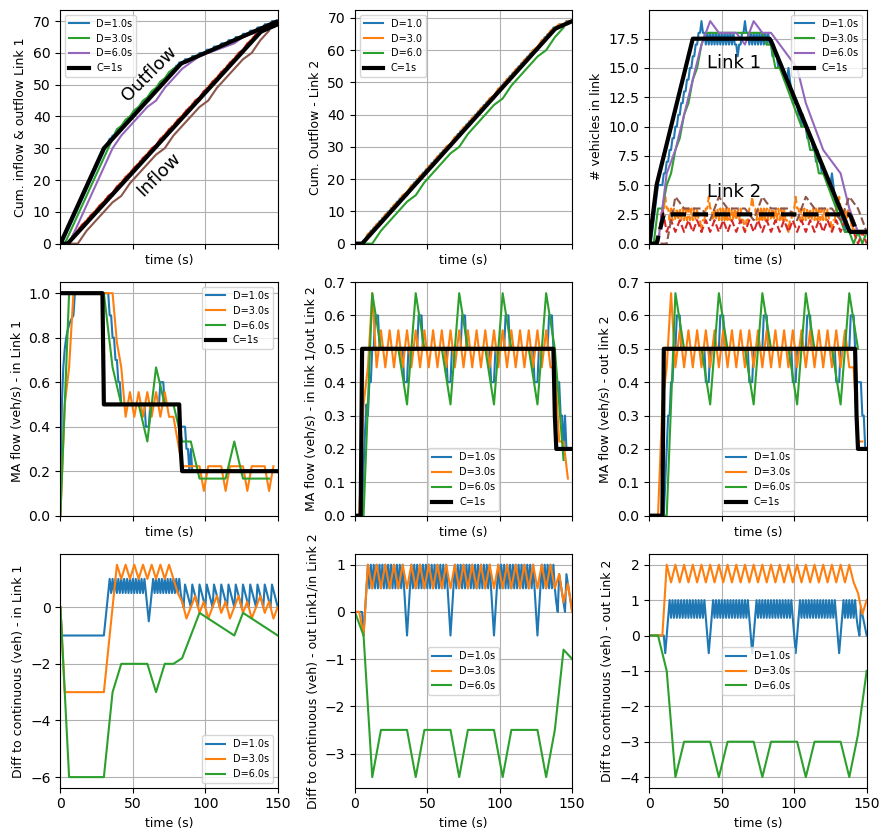

In [4]:
f, axs = pylab.subplots(3,3, figsize=(9,8.5), sharex=True)

from_time = 0
to_time = 150




for tstep in results_by_tstep:
    from_step = int(from_time/tstep)
    to_step = int(to_time/tstep)

    axs[0,0].plot(results_by_tstep[tstep].get_times(1)[from_step:to_step], 
                  results_by_tstep[tstep].links[0].cumulative_inflows[from_step:to_step], label='D={}s'.format(tstep))
    axs[0,0].plot(results_by_tstep[tstep].get_times(1)[from_step:to_step], 
                results_by_tstep[tstep].links[0].cumulative_outflows[from_step:to_step], )
    axs[0,1].plot(results_by_tstep[tstep].get_times(1)[from_step:to_step], 
                 results_by_tstep[tstep].links[1].cumulative_inflows[from_step:to_step], label='D={}'.format(tstep))
    #axs[0,1].plot(results_by_tstep[tstep].get_times(1)[from_step:to_step], 
    #             results_by_tstep[tstep].links[1].cumulative_outflows[from_step:to_step], linewidth=1)
    

    #let's get 10 seconds average flow
    f1s = []
    f2s = []
    f3s = []

    shift = int(10/tstep)
    for t in range(len(results_by_tstep[tstep].get_times())):
        if t < shift:
            s = 1+t
        else:
            s = shift

        f1s.append((results_by_tstep[tstep].links[0].cumulative_inflows[t+1]-results_by_tstep[tstep].links[0].cumulative_inflows[t-s+1])/s)
        f2s.append((results_by_tstep[tstep].links[1].cumulative_inflows[t+1]-results_by_tstep[tstep].links[1].cumulative_inflows[t-s+1])/s)
        f3s.append((results_by_tstep[tstep].links[1].cumulative_outflows[t+1]-results_by_tstep[tstep].links[1].cumulative_outflows[t-s+1])/s)
    
    axs[1,0].plot(results_by_tstep[tstep].get_times(), [f/tstep for f in f1s], label='D={}s'.format(tstep))
    axs[1,1].plot(results_by_tstep[tstep].get_times(), [f/tstep for f in f2s], label='D={}s'.format(tstep))
    axs[1,2].plot(results_by_tstep[tstep].get_times(), [f/tstep for f in f3s], label='D={}s'.format(tstep))

    
    n_v1 = [results_by_tstep[tstep].links[0].cumulative_inflows[t]-results_by_tstep[tstep].links[0].cumulative_outflows[t] for t in range(len(results_by_tstep[tstep].get_times(1)))]
    axs[0,2].plot(results_by_tstep[tstep].get_times(1), n_v1, label='D={}s'.format(tstep))

    ts = results_by_tstep[tstep].get_times(1)
    axs[2,0].plot(results_by_tstep[tstep].get_times(1),
                       [results_by_tstep[tstep].links[0].cumulative_inflows[t]-result_continuous.links[0].cumulative_inflows[t*int(tstep)] for t in range(len(ts))],
                        label='D={}s'.format(tstep))
    axs[2,1].plot(results_by_tstep[tstep].get_times(1),
                          [results_by_tstep[tstep].links[1].cumulative_inflows[t]-result_continuous.links[1].cumulative_inflows[t*int(tstep)] for t in range(len(ts))],
                            label='D={}s'.format(tstep))
    axs[2,2].plot(results_by_tstep[tstep].get_times(1),
                            [results_by_tstep[tstep].links[1].cumulative_outflows[t]-result_continuous.links[1].cumulative_outflows[t*int(tstep)] for t in range(len(ts))],
                                label='D={}s'.format(tstep))
    
    n_v2 = [results_by_tstep[tstep].links[1].cumulative_inflows[t]-results_by_tstep[tstep].links[1].cumulative_outflows[t] for t in range(len(results_by_tstep[tstep].get_times(1)))]
    axs[0,2].plot(results_by_tstep[tstep].get_times(1), n_v2,linestyle='--')
    
    print( [results_by_tstep[tstep].links[0].cumulative_inflows[t]-result_continuous.links[0].cumulative_inflows[t*int(tstep)] for t in range(len(ts))])

axs[0,0].plot(result_continuous.get_times(1)[from_time:to_time], result_continuous.links[0].cumulative_inflows[from_time:to_time], color='black', label='C=1s', linewidth=3)
axs[0,0].plot(result_continuous.get_times(1)[from_time:to_time], result_continuous.links[0].cumulative_outflows[from_time:to_time], color='black',  linewidth=3)
axs[0,1].plot(result_continuous.get_times(1)[from_time:to_time], result_continuous.links[1].cumulative_inflows[from_time:to_time], color='black', label='C=1s', linewidth=3)
#axs[0,1].plot(result_continuous.get_times(1)[from_time:to_time], result_continuous.links[1].cumulative_outflows[from_time:to_time], color='black', linewidth=2)

n_v1 = [result_continuous.links[0].cumulative_inflows[t]-result_continuous.links[0].cumulative_outflows[t] for t in range(len(result_continuous.get_times(1)))]
n_v2 = [result_continuous.links[1].cumulative_inflows[t]-result_continuous.links[1].cumulative_outflows[t] for t in range(len(result_continuous.get_times(1)))]
axs[0,2].plot(result_continuous.get_times(1), n_v1, color='black', label='C=1s', linewidth=3)
axs[0,2].plot(result_continuous.get_times(1), n_v2, color='black', linestyle='--', linewidth=3)

f1s = [result_continuous.links[0].cumulative_inflows[t+1]-result_continuous.links[0].cumulative_inflows[t] for t in range(len(result_continuous.get_times()))]
f2s = [result_continuous.links[1].cumulative_inflows[t+1]-result_continuous.links[1].cumulative_inflows[t] for t in range(len(result_continuous.get_times()))]
f3s = [result_continuous.links[1].cumulative_outflows[t+1]-result_continuous.links[1].cumulative_outflows[t] for t in range(len(result_continuous.get_times()))]

axs[1,0].plot(result_continuous.get_times(), [f for f in f1s], color='black', label='C=1s', linewidth=3)
axs[1,1].plot(result_continuous.get_times(), [f for f in f2s], color='black', label='C=1s', linewidth=3)
axs[1,2].plot(result_continuous.get_times(), [f for f in f3s], color='black', label='C=1s', linewidth=3)


fsize=9
for i in range(3):
    for j in range(3):
        axs[i,j].grid()
        axs[i,j].set_xlim(from_time, to_time)
        axs[i,j].set_xlabel('time (s)', fontsize=fsize)
        axs[i,j].legend(fontsize=7)
        if i < 2:
            axs[i,j].set_ylim(0, None)
        #axs[i,j].set_ylabel('cumulative inflow')



axs[0,0].annotate('Outflow', xy=(50, 16), xytext=(40, 45), xycoords='data', fontsize=fsize+4, rotation=45)
axs[0,0].annotate('Inflow', xy=(50, 4), xytext=(50, 15), xycoords='data', fontsize=fsize+4, rotation=45)


#let's anotate in the number of vehicles in the link to point out which link is which.
axs[0,2].annotate('Link 1', xy=(50, 16), xytext=(40, 15), xycoords='data', fontsize=fsize+4)
axs[0,2].annotate('Link 2', xy=(50, 4), xytext=(40, 4), xycoords='data', fontsize=fsize+4)

axs[0,0].set_ylabel("Cum. inflow & outflow Link 1", fontsize=fsize)
axs[0,1].set_ylabel("Cum. Outflow - Link 2", fontsize=fsize)
axs[0,2].set_ylabel("# vehicles in link", fontsize=fsize)
axs[1,0].set_ylabel("MA flow (veh/s) - in Link 1 ", fontsize=fsize)
axs[1,1].set_ylabel("MA flow (veh/s) - in link 1/out Link 2", fontsize=fsize)
axs[1,2].set_ylabel("MA flow (veh/s) - out link 2", fontsize=fsize)

axs[2,0].set_ylabel("Diff to continuous (veh) - in Link 1", fontsize=fsize)
axs[2,1].set_ylabel("Diff to continuous (veh) - out Link1/in Link 2", fontsize=fsize)
axs[2,2].set_ylabel("Diff to continuous (veh) - out Link 2", fontsize=fsize)

pylab.tight_layout()

pylab.show()

# Diverge Case

In [5]:
demands = [0.8 for _ in range(6)]
demands.extend([0.4 for _ in range(9)])

def run_continuous_diverge():
    inbound_link = continuous.link.Link(length=150, vf=30.0, w=6.0, kj=0.2)
    outbound_link_1 = continuous.link.Link(length=150, vf=30.0, w=6.0, kj=0.1)
    outbound_link_2 = continuous.link.Link(length=150, vf=30.0, w=6.0, kj=0.1)

    #demands = [1.0, 0.4, 0.3]
    origin_node = continuous.originNode.OriginNode(1, inbound_link, demands)
    diverge_node = continuous.divergeNode.DivergeNode(2, inbound_link, [outbound_link_1, outbound_link_2], [0.75, 0.25])
    
    destination_node_1 = continuous.destinationNode.DestinationNode(3, outbound_link_1)
    destination_node_2 = continuous.destinationNode.DestinationNode(4, outbound_link_2)

    links = [inbound_link, outbound_link_1, outbound_link_2]
    nodes = [origin_node, diverge_node, destination_node_1, destination_node_2]

    sim = simulationRunner.SimulationRunner(links = links, nodes = nodes, time_step = 1.0, total_time=total_time)
    sim.run()
    return sim

def run_discrete_diverge(time_step):
    inbound_link = discrete.link.Link(link_id = 1, length=150, vf=30.0, w=6.0, kj=0.2, initial_capacity=0)
    outbound_link_1 = discrete.link.Link(link_id = 2, length=150, vf=30.0, w=6.0, kj=0.1, initial_capacity=0)
    outbound_link_2 = discrete.link.Link(link_id = 3, length=150, vf=30.0, w=6.0, kj=0.1, initial_capacity=0)

    #demands = [1.0, 0.4, 0.3]
    trips = trip.Trip.from_continuous_demand(demands, total_time, route_integer_share = {(1,2): 3, (1,3): 1})
    origin_node = discrete.originNode.OriginNode(1, inbound_link, trips)
    diverge_node = discrete.divergeNode.DivergeNode(2, inbound_link, [outbound_link_1, outbound_link_2])
    
    destination_node_1 = discrete.destinationNode.DestinationNode(3, outbound_link_1)
    destination_node_2 = discrete.destinationNode.DestinationNode(4, outbound_link_2)

    links = [inbound_link, outbound_link_1, outbound_link_2]
    nodes = [origin_node, diverge_node, destination_node_1, destination_node_2]

    sim = simulationRunner.SimulationRunner(links = links, nodes = nodes, time_step = time_step, total_time=total_time)
    sim.run()
    return sim

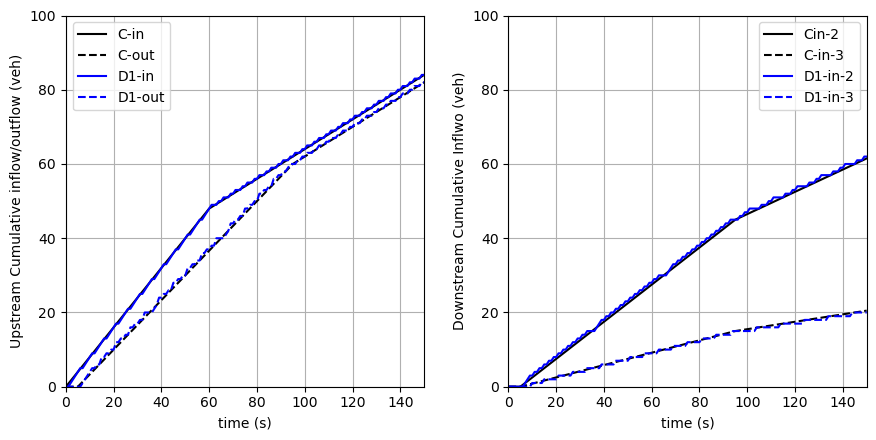

In [6]:
sim_continuous = run_continuous_diverge()
sim_discrete = run_discrete_diverge(1.0)

f, axs = pylab.subplots(1,2, figsize=(9,4.5))
times_p = sim_discrete.get_times(1)

axs[0].plot(times_p, sim_continuous.links[0].cumulative_inflows, label='C-in', color='black')
axs[0].plot(times_p, sim_continuous.links[0].cumulative_outflows,color='black', label='C-out', linestyle='--')
axs[0].plot(times_p, sim_discrete.links[0].cumulative_inflows, label='D1-in', color='blue')
axs[0].plot(times_p, sim_discrete.links[0].cumulative_outflows, label='D1-out', color='blue', linestyle='--')

axs[1].plot(times_p, sim_continuous.links[1].cumulative_inflows, label='Cin-2', color='black')
axs[1].plot(times_p, sim_continuous.links[2].cumulative_inflows, label='C-in-3', color='black', linestyle='--')
axs[1].plot(times_p, sim_discrete.links[1].cumulative_inflows, label='D1-in-2', color='blue')
axs[1].plot(times_p, sim_discrete.links[2].cumulative_inflows, label='D1-in-3', color='blue', linestyle='--')

axs[0].legend()
axs[1].legend()
axs[0].set_xlabel('time (s)')
axs[1].set_xlabel('time (s)')
axs[0].set_ylabel('Upstream Cumulative inflow/outflow (veh)')
axs[1].set_ylabel("Downstream Cumulative Inflwo (veh)")

axs[0].grid(True)
axs[1].grid(True)
axs[0].set_xlim(0, 150)
axs[1].set_xlim(0, 150)
axs[0].set_ylim(0, 100)
axs[1].set_ylim(0, 100)
pylab.tight_layout()
pylab.show()

# Merge Case

In [7]:
dem_1 = [0.3 for _ in range(15)]

dem_2 = [0.3 for _ in range(15)]
for p in range(6,15):
    dem_2[p] = 0.1

def run_continuous_merge(priorities):
    inbound_link_1 = continuous.link.Link(link_id=1,length=150, vf=30.0, w=6.0, kj=0.1)
    inbound_link_2 = continuous.link.Link(link_id=2, length=150, vf=30.0, w=6.0, kj=0.1)
    outbound_link = continuous.link.Link(link_id=3, length=150, vf=30.0, w=6.0, kj=0.1)

    origin_node_1 = continuous.originNode.OriginNode(1, inbound_link_1, dem_1)
    origin_node_2 = continuous.originNode.OriginNode(2, inbound_link_2, dem_2)
    merge_node = continuous.mergeNode.MergeNode(3, [inbound_link_1, inbound_link_2], outbound_link, priorities)
    
    destination_node = continuous.destinationNode.DestinationNode(4, outbound_link)

    links = [inbound_link_1, inbound_link_2, outbound_link]
    nodes = [origin_node_1, origin_node_2, merge_node, destination_node]

    sim = simulationRunner.SimulationRunner(links = links, nodes = nodes, time_step = 1.0, total_time=total_time)
    sim.run()
    return sim

def run_discrete_merge(priorities, time_step):
    inbound_link_1 = discrete.link.Link(link_id=1,length=150, vf=30.0, w=6.0, kj=0.1, initial_capacity=0)
    inbound_link_2 = discrete.link.Link(link_id=2, length=150, vf=30.0, w=6.0, kj=0.1, initial_capacity=0)
    outbound_link = discrete.link.Link(link_id=3, length=150, vf=30.0, w=6.0, kj=0.1, initial_capacity=0)

    origin_node_1 = discrete.originNode.OriginNode(1, inbound_link_1, trip.Trip.from_continuous_demand(dem_1, total_time))
    origin_node_2 = discrete.originNode.OriginNode(2, inbound_link_2, trip.Trip.from_continuous_demand(dem_2, total_time))
    merge_node = discrete.mergeNode.MergeNode(3, outbound_link, [inbound_link_1, inbound_link_2], priorities)
    
    destination_node = discrete.destinationNode.DestinationNode(4, outbound_link)

    links = [inbound_link_1, inbound_link_2, outbound_link]
    nodes = [origin_node_1, origin_node_2, merge_node, destination_node]

    sim = simulationRunner.SimulationRunner(links = links, nodes = nodes, time_step = time_step, total_time=total_time)
    sim.run()
    return sim

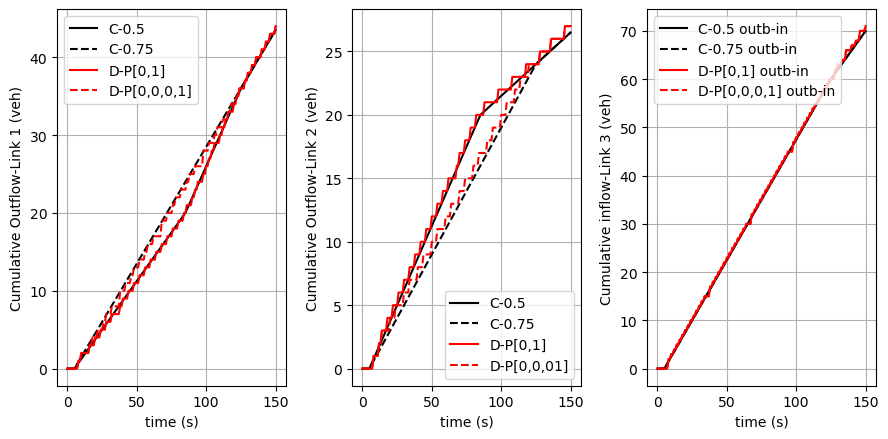

In [8]:

cont_05 = run_continuous_merge([0.5, 0.5])
cont_075 = run_continuous_merge([0.75, 0.25])

disc_05 = run_discrete_merge([0, 1], 1.0)
disc_75 = run_discrete_merge([0, 0, 0, 1], 1.0)

f, axs = pylab.subplots(1,3, figsize=(9,4.5))
times_p = cont_05.get_times(1)

axs[0].plot(times_p, cont_05.links[0].cumulative_outflows, label='C-0.5', color='black')
axs[0].plot(times_p, cont_075.links[0].cumulative_outflows, label='C-0.75', color='black', linestyle='--')

axs[0].plot(times_p, disc_05.links[0].cumulative_outflows, label='D-P[0,1]', color='red')
axs[0].plot(times_p, disc_75.links[0].cumulative_outflows, label='D-P[0,0,0,1]', color='red', linestyle='--')

axs[1].plot(times_p, cont_05.links[1].cumulative_outflows, label='C-0.5', color='black')
axs[1].plot(times_p, cont_075.links[1].cumulative_outflows, label='C-0.75', color='black', linestyle='--')
axs[1].plot(times_p, disc_05.links[1].cumulative_outflows, label='D-P[0,1]', color='red')
axs[1].plot(times_p, disc_75.links[1].cumulative_outflows, label='D-P[0,0,01]', color='red', linestyle='--')

axs[2].plot(times_p, cont_05.links[2].cumulative_inflows, label='C-0.5 outb-in', color='black')
axs[2].plot(times_p, cont_075.links[2].cumulative_inflows, label='C-0.75 outb-in', color='black', linestyle='--')
axs[2].plot(times_p, disc_05.links[2].cumulative_inflows, label='D-P[0,1] outb-in', color='red')
axs[2].plot(times_p, disc_75.links[2].cumulative_inflows, label='D-P[0,0,0,1] outb-in', color='red', linestyle='--')

axs[0].legend()
axs[1].legend()
axs[2].legend()
axs[0].set_xlabel('time (s)')
axs[1].set_xlabel('time (s)')
axs[2].set_xlabel('time (s)')
axs[0].set_ylabel('Cumulative Outflow-Link 1 (veh)')
axs[1].set_ylabel("Cumulative Outflow-Link 2 (veh)")
axs[2].set_ylabel("Cumulative inflow-Link 3 (veh)")

axs[0].grid(True)
axs[1].grid(True)
axs[2].grid(True)

pylab.tight_layout()
pylab.show()


# Comparison with MatSim Link

Link and parameters with the same structures but there is no state variable for capacity and it is used $int(C\Delta t)$ instead.

Here a comparison with continuous case and two different time-steps.

In [9]:
def run_matsim_discrete(time_step):
    inbound_link = discrete.matsimLink.MatsimLink(length=150, vf=30.0, w=6.0, kj=0.2, initial_capacity=0)
    outbound_link = discrete.matsimLink.MatsimLink(length=150, vf=30.0, w=6.0, kj=0.1, initial_capacity=0)

    #demands = [1.0, 0.4, 0.3]
    trips = trip.Trip.from_continuous_demand(demands_one_one, total_time, [1,2])
    origin_node = discrete.originNode.OriginNode(1, inbound_link, trips)
    oneOneNode = discrete.oneToOneNode.OneToOneNode(2, inbound_link, outbound_link)
    destination_node = discrete.destinationNode.DestinationNode(3, outbound_link)

    links = [inbound_link, outbound_link]
    nodes = [origin_node, oneOneNode, destination_node]

    sim = simulationRunner.SimulationRunner(links = links, nodes = nodes, time_step = time_step, total_time=total_time)
    sim.run()
    return sim

76 151


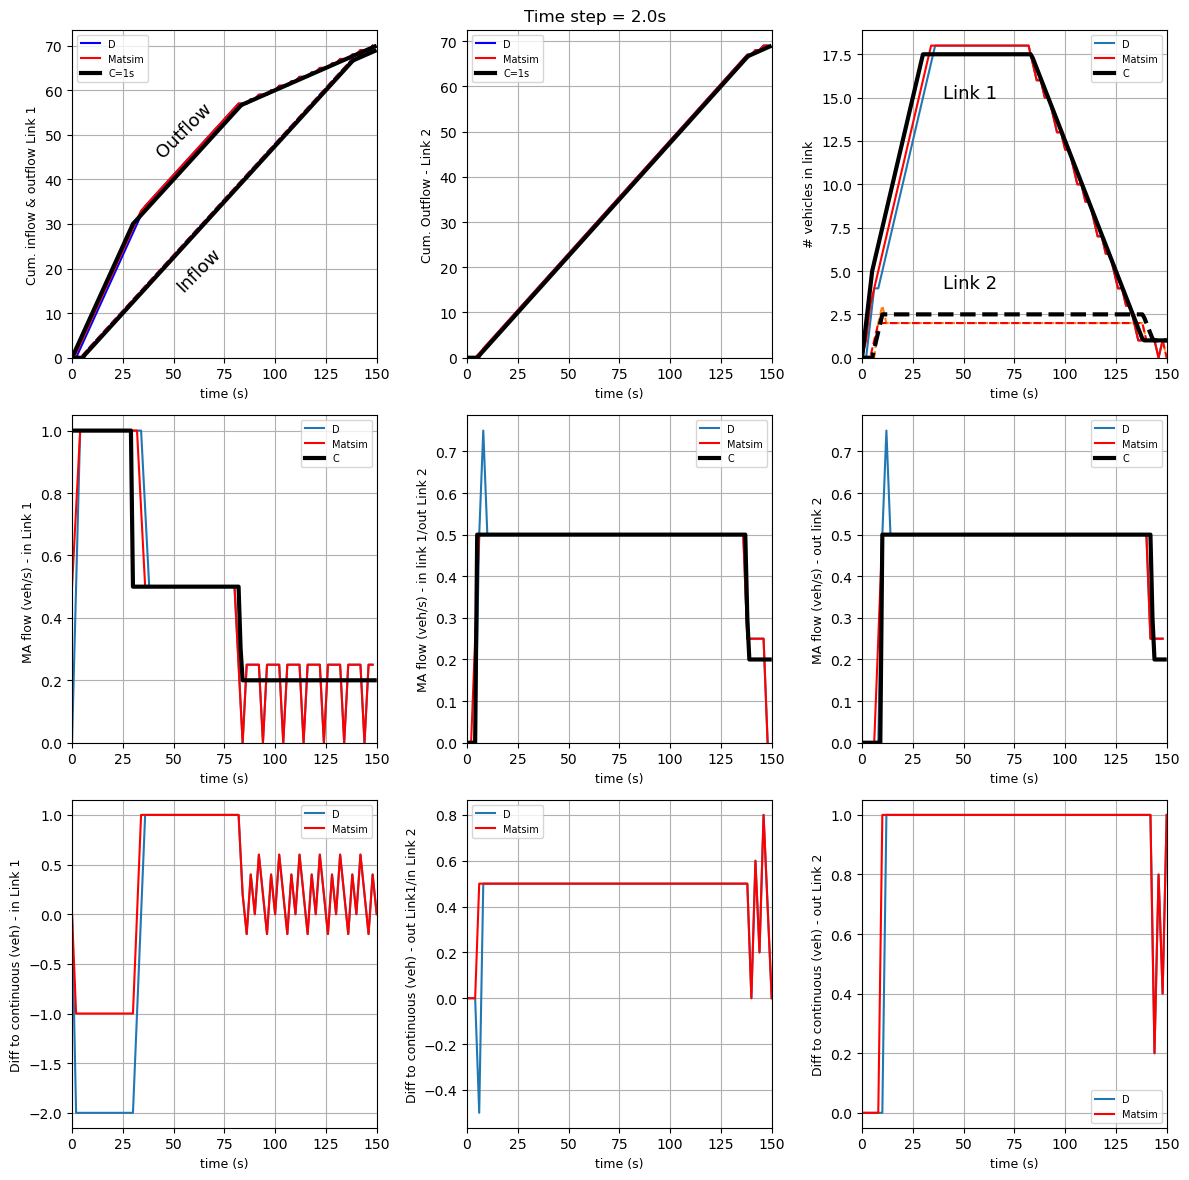

51 151


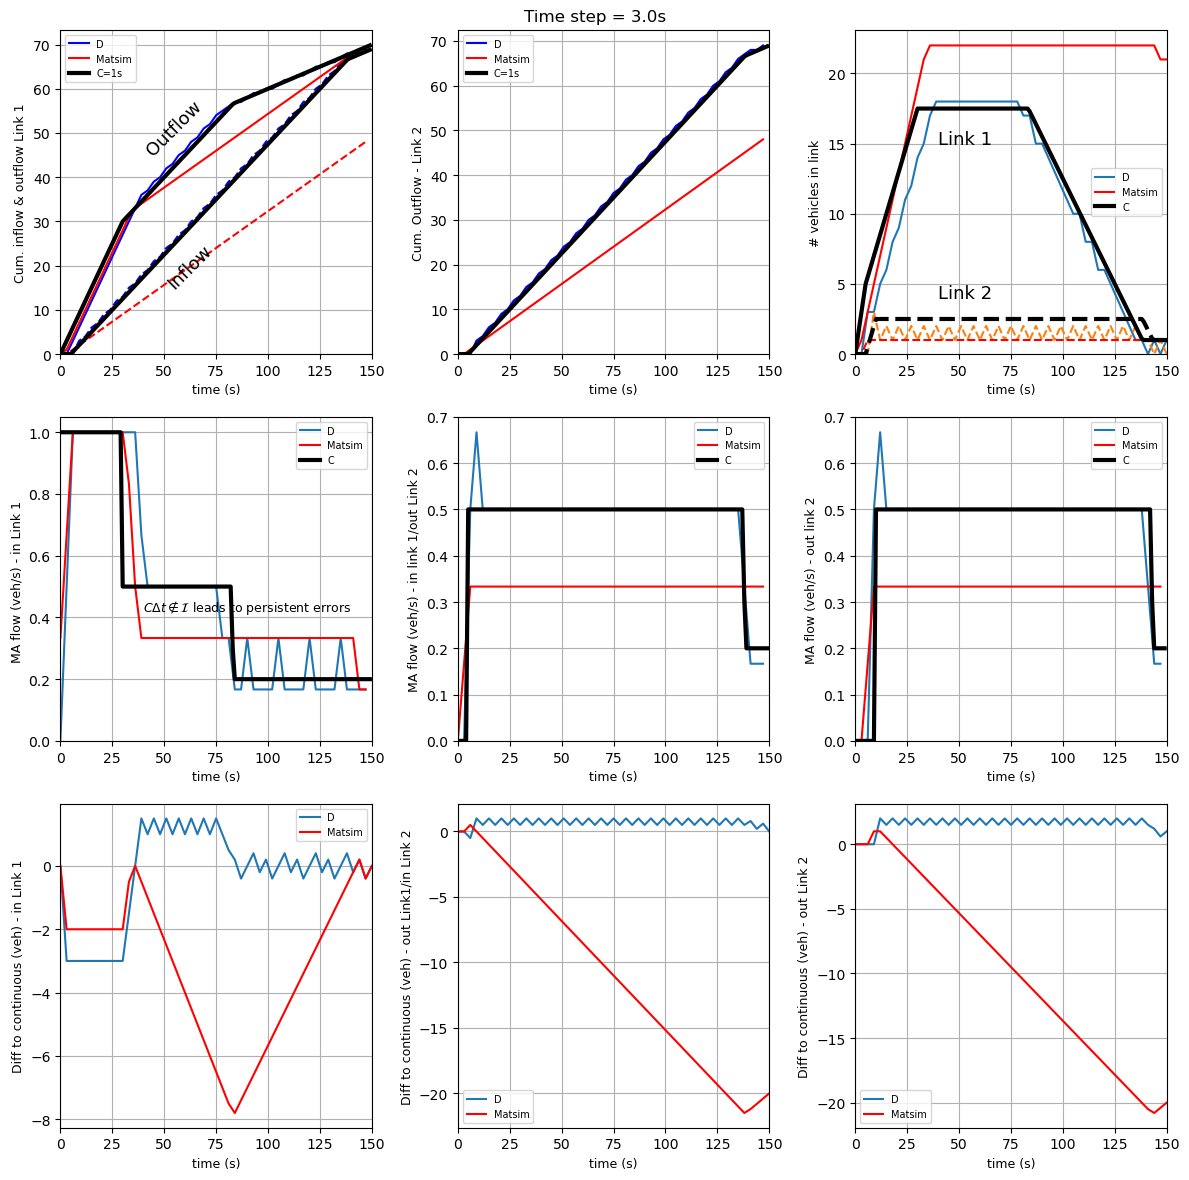

38 151


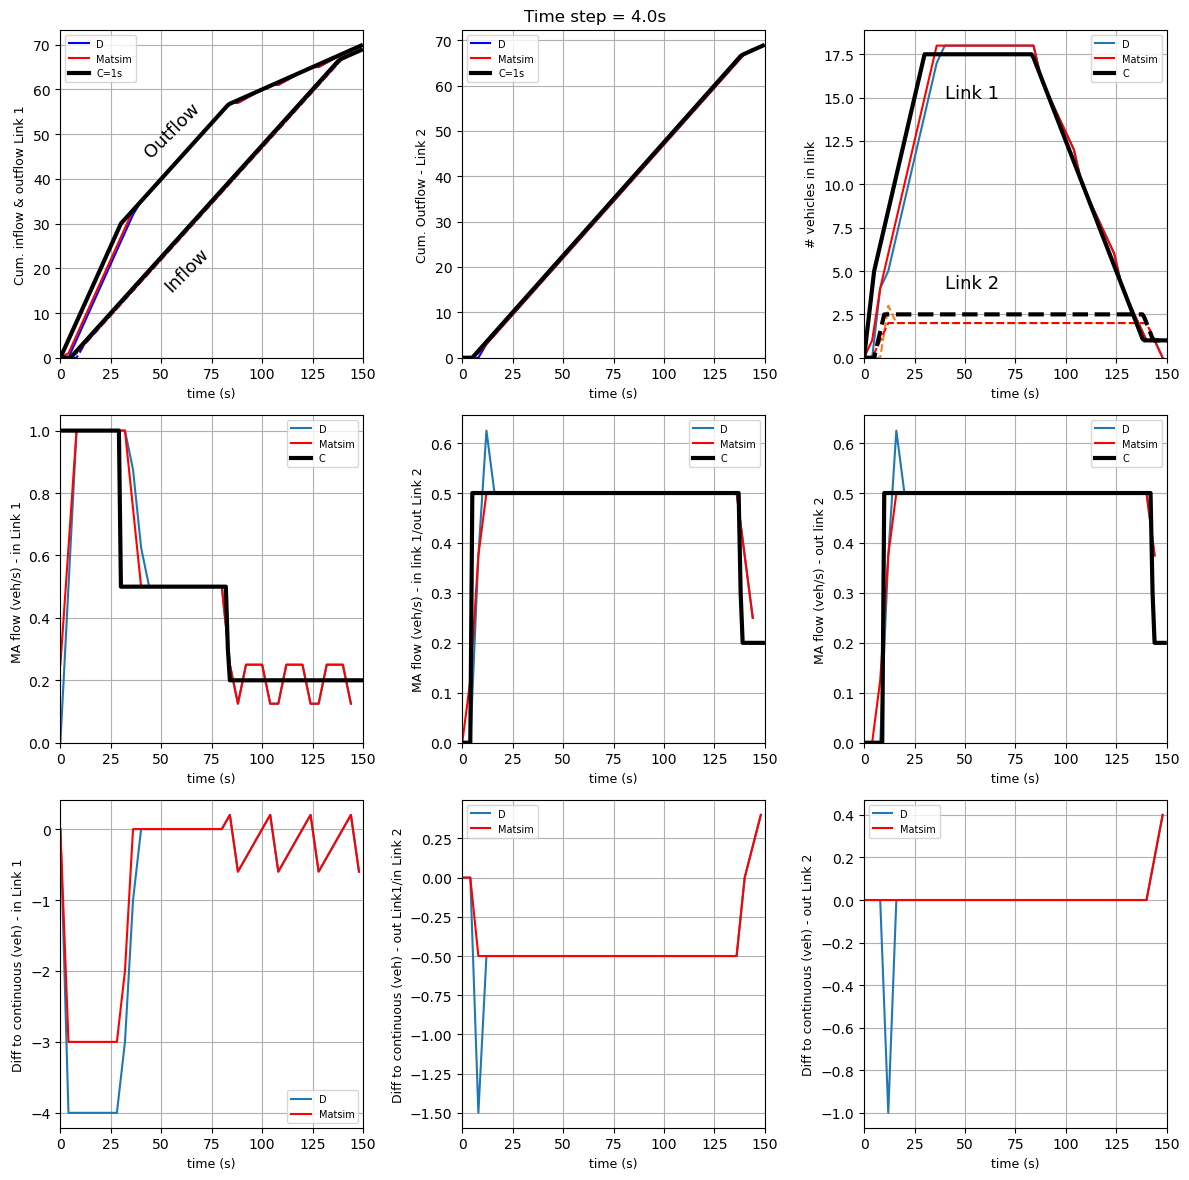

31 151


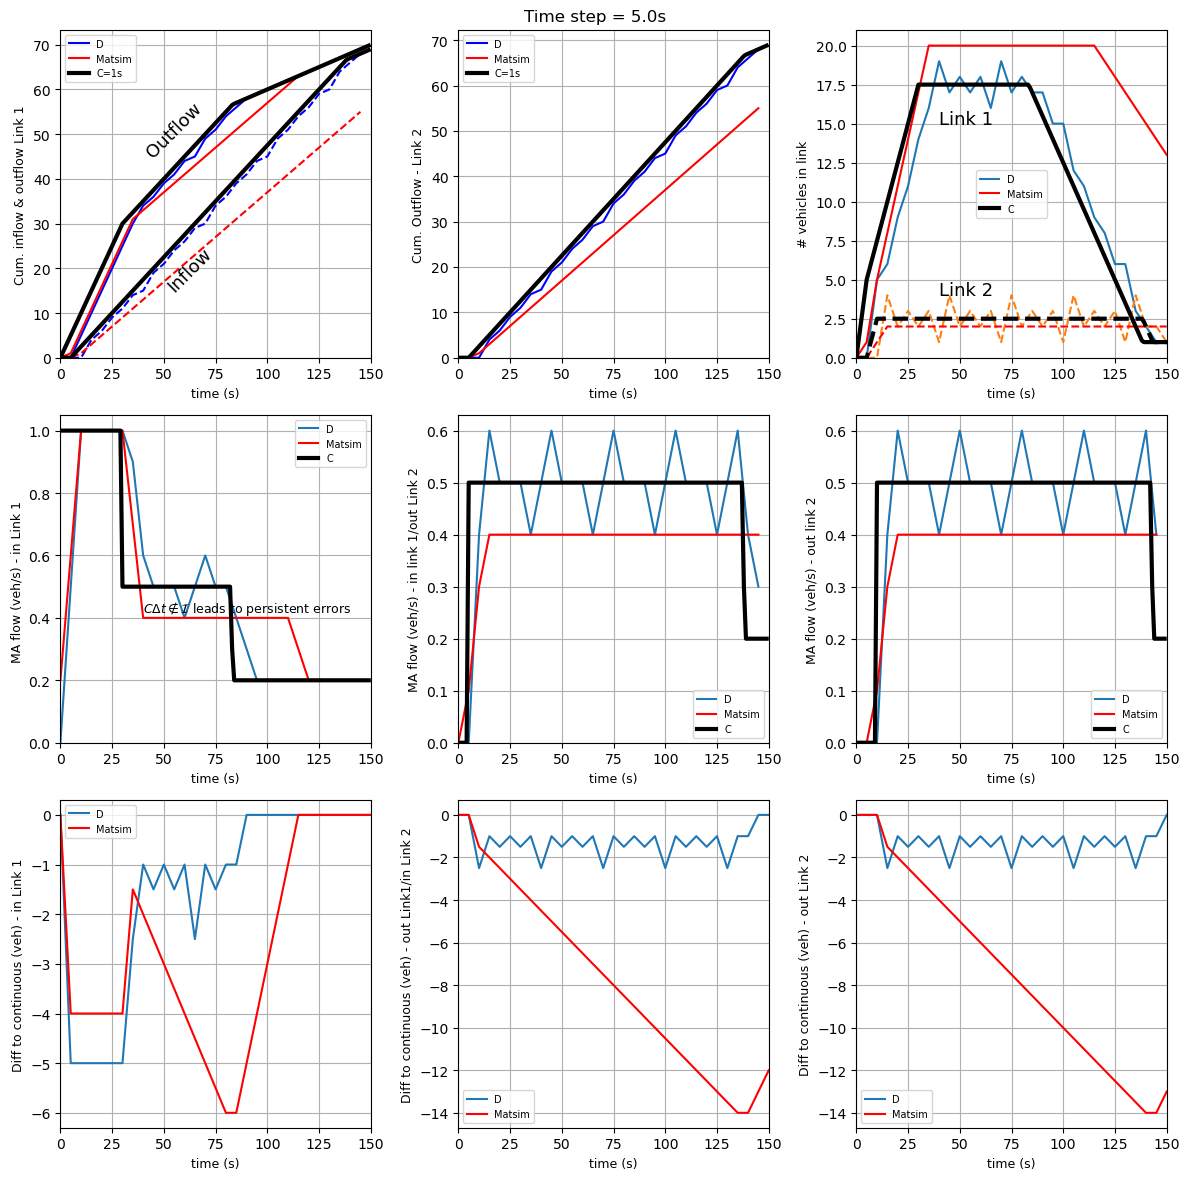

In [10]:
shifts = [14, 15, 16, 15]
for z,time_step in enumerate([2.0, 3.0, 4.0, 5.0]):
    result_continuous = run_continuous(1.0)
    discrete_result = run_discrete(time_step)
    matsim = run_matsim_discrete(time_step)

    f, axs = pylab.subplots(3,3, figsize=(12,12))
    f.suptitle('Time step = {}s'.format(time_step))

    from_time = 0
    to_time = 150

    from_step = int(from_time/time_step)
    to_step = int(to_time/time_step)

    axs[0,0].plot(discrete_result.get_times(1)[from_step:to_step], 
                  discrete_result.links[0].cumulative_inflows[from_step:to_step], color='blue', label='D')
    axs[0,0].plot(discrete_result.get_times(1)[from_step:to_step], 
                discrete_result.links[0].cumulative_outflows[from_step:to_step], color='blue', linestyle='--')
    axs[0,1].plot(discrete_result.get_times(1)[from_step:to_step], 
                 discrete_result.links[1].cumulative_inflows[from_step:to_step], color='blue', label='D')
    
    axs[0,0].plot(matsim.get_times(1)[from_step:to_step], 
                  matsim.links[0].cumulative_inflows[from_step:to_step], color='red', label='Matsim')
    axs[0,0].plot(matsim.get_times(1)[from_step:to_step], 
                matsim.links[0].cumulative_outflows[from_step:to_step],color='red', linestyle='--')
    axs[0,1].plot(matsim.get_times(1)[from_step:to_step], 
                 matsim.links[1].cumulative_inflows[from_step:to_step],color='red', label='Matsim')
    #axs[0,1].plot(results_by_tstep[tstep].get_times(1)[from_step:to_step], 
    #             results_by_tstep[tstep].links[1].cumulative_outflows[from_step:to_step], linewidth=1)
    

    #let's get 10 seconds average flow
    f1s = []
    f2s = []
    f3s = []

    f1s_matsim = []
    f2s_matsim = []
    f3s_matsim = []


    shift = int(shifts[z]/tstep)
    for t in range(len(discrete_result.get_times())):
        if t < shift:
            s = 1+t
        else:
            s = shift

        f1s.append((discrete_result.links[0].cumulative_inflows[t+1]-discrete_result.links[0].cumulative_inflows[t-s+1])/s)
        f2s.append((discrete_result.links[1].cumulative_inflows[t+1]-discrete_result.links[1].cumulative_inflows[t-s+1])/s)
        f3s.append((discrete_result.links[1].cumulative_outflows[t+1]-discrete_result.links[1].cumulative_outflows[t-s+1])/s)

        f1s_matsim.append((matsim.links[0].cumulative_inflows[t+1]-matsim.links[0].cumulative_inflows[t-s+1])/s)
        f2s_matsim.append((matsim.links[1].cumulative_inflows[t+1]-matsim.links[1].cumulative_inflows[t-s+1])/s)
        f3s_matsim.append((matsim.links[1].cumulative_outflows[t+1]-matsim.links[1].cumulative_outflows[t-s+1])/s)
    
    axs[1,0].plot(discrete_result.get_times(), [f/time_step for f in f1s], label='D')
    axs[1,1].plot(discrete_result.get_times(), [f/time_step for f in f2s], label='D')
    axs[1,2].plot(discrete_result.get_times(), [f/time_step for f in f3s], label='D')

    axs[1,0].plot(matsim.get_times(), [f/time_step for f in f1s_matsim], label='Matsim', color='red')
    axs[1,1].plot(matsim.get_times(), [f/time_step for f in f2s_matsim], label='Matsim', color='red')
    axs[1,2].plot(matsim.get_times(), [f/time_step for f in f3s_matsim], label='Matsim', color='red')

    if time_step in [3.0, 5.0]:
        axs[1,0].annotate('$C\\Delta t \\notin \\mathcal{I}$ leads to persistent errors', xy=(40, 0.42), xytext=(40, 0.42), xycoords='data', fontsize=fsize, rotation=0)
    
    n_v1 = [discrete_result.links[0].cumulative_inflows[t]-discrete_result.links[0].cumulative_outflows[t] for t in range(len(discrete_result.get_times(1)))]
    axs[0,2].plot(discrete_result.get_times(1), n_v1, label='D'.format(tstep))

    n_v1_matsim = [matsim.links[0].cumulative_inflows[t]-matsim.links[0].cumulative_outflows[t] for t in range(len(matsim.get_times(1)))]
    axs[0,2].plot(matsim.get_times(1), n_v1_matsim, label='Matsim'.format(tstep), color='red')

    ts = discrete_result.get_times(1)
    print(len(ts), len(result_continuous.get_times(1)))
    axs[2,0].plot(discrete_result.get_times(1),
                      [discrete_result.links[0].cumulative_inflows[t]-result_continuous.links[0].cumulative_inflows[int(t*time_step)] for t in range(len(ts))],
                       label='D')
    axs[2,1].plot(discrete_result.get_times(1),
                         [discrete_result.links[1].cumulative_inflows[t]-result_continuous.links[1].cumulative_inflows[int(t*time_step)] for t in range(len(ts))],
                           label='D')
    axs[2,2].plot(discrete_result.get_times(1),
                           [discrete_result.links[1].cumulative_outflows[t]-result_continuous.links[1].cumulative_outflows[int(t*time_step)] for t in range(len(ts))],
                               label='D')
    
    axs[2,0].plot(matsim.get_times(1),
                  [matsim.links[0].cumulative_inflows[t]-result_continuous.links[0].cumulative_inflows[int(t*time_step)] for t in range(len(ts))],
                     label='Matsim', color='red')
    
    axs[2,1].plot(matsim.get_times(1),
                  [matsim.links[1].cumulative_inflows[t]-result_continuous.links[1].cumulative_inflows[int(t*time_step)] for t in range(len(ts))],
                        label='Matsim', color='red')
    axs[2,2].plot(matsim.get_times(1),
                  [matsim.links[1].cumulative_outflows[t]-result_continuous.links[1].cumulative_outflows[int(t*time_step)] for t in range(len(ts))],
                        label='Matsim', color='red')
    
    n_v2 = [discrete_result.links[1].cumulative_inflows[t]-discrete_result.links[1].cumulative_outflows[t] for t in range(len(discrete_result.get_times(1)))]
    axs[0,2].plot(discrete_result.get_times(1), n_v2,linestyle='--')
    n_v2_matsim = [matsim.links[1].cumulative_inflows[t]-matsim.links[1].cumulative_outflows[t] for t in range(len(matsim.get_times(1)))]
    axs[0,2].plot(matsim.get_times(1), n_v2_matsim,linestyle='--', color='red')
    
    #print( [discrete_result.links[0].cumulative_inflows[t]-result_continuous.links[0].cumulative_inflows[t*int(tstep)] for t in range(len(ts))])

    axs[0,0].plot(result_continuous.get_times(1)[from_time:to_time], result_continuous.links[0].cumulative_inflows[from_time:to_time], color='black', label='C=1s', linewidth=3)
    axs[0,0].plot(result_continuous.get_times(1)[from_time:to_time], result_continuous.links[0].cumulative_outflows[from_time:to_time], color='black',  linewidth=3)
    axs[0,1].plot(result_continuous.get_times(1)[from_time:to_time], result_continuous.links[1].cumulative_inflows[from_time:to_time], color='black', label='C=1s', linewidth=3)
    #axs[0,1].plot(result_continuous.get_times(1)[from_time:to_time], result_continuous.links[1].cumulative_outflows[from_time:to_time], color='black', linewidth=2)

    n_v1 = [result_continuous.links[0].cumulative_inflows[t]-result_continuous.links[0].cumulative_outflows[t] for t in range(len(result_continuous.get_times(1)))]
    n_v2 = [result_continuous.links[1].cumulative_inflows[t]-result_continuous.links[1].cumulative_outflows[t] for t in range(len(result_continuous.get_times(1)))]
    axs[0,2].plot(result_continuous.get_times(1), n_v1, color='black', label='C', linewidth=3)
    axs[0,2].plot(result_continuous.get_times(1), n_v2, color='black', linestyle='--', linewidth=3)

    f1s = [result_continuous.links[0].cumulative_inflows[t+1]-result_continuous.links[0].cumulative_inflows[t] for t in range(len(result_continuous.get_times()))]
    f2s = [result_continuous.links[1].cumulative_inflows[t+1]-result_continuous.links[1].cumulative_inflows[t] for t in range(len(result_continuous.get_times()))]
    f3s = [result_continuous.links[1].cumulative_outflows[t+1]-result_continuous.links[1].cumulative_outflows[t] for t in range(len(result_continuous.get_times()))]

    axs[1,0].plot(result_continuous.get_times(), [f/1.0 for f in f1s], color='black', label='C', linewidth=3)
    axs[1,1].plot(result_continuous.get_times(), [f/1.0 for f in f2s], color='black', label='C', linewidth=3)
    axs[1,2].plot(result_continuous.get_times(), [f/1.0 for f in f3s], color='black', label='C', linewidth=3)


    fsize=9
    for i in range(3):
        for j in range(3):
            axs[i,j].grid()
            axs[i,j].set_xlim(from_time, to_time)
            axs[i,j].set_xlabel('time (s)', fontsize=fsize)
            axs[i,j].legend(fontsize=7)
            if i < 2:
                axs[i,j].set_ylim(0, None)
            #axs[i,j].set_ylabel('cumulative inflow')



    axs[0,0].annotate('Outflow', xy=(50, 16), xytext=(40, 45), xycoords='data', fontsize=fsize+4, rotation=45)
    axs[0,0].annotate('Inflow', xy=(50, 4), xytext=(50, 15), xycoords='data', fontsize=fsize+4, rotation=45)


    #let's anotate in the number of vehicles in the link to point out which link is which.
    axs[0,2].annotate('Link 1', xy=(50, 16), xytext=(40, 15), xycoords='data', fontsize=fsize+4)
    axs[0,2].annotate('Link 2', xy=(50, 4), xytext=(40, 4), xycoords='data', fontsize=fsize+4)

    axs[0,0].set_ylabel("Cum. inflow & outflow Link 1", fontsize=fsize)
    axs[0,1].set_ylabel("Cum. Outflow - Link 2", fontsize=fsize)
    axs[0,2].set_ylabel("# vehicles in link", fontsize=fsize)
    axs[1,0].set_ylabel("MA flow (veh/s) - in Link 1 ", fontsize=fsize)
    axs[1,1].set_ylabel("MA flow (veh/s) - in link 1/out Link 2", fontsize=fsize)
    axs[1,2].set_ylabel("MA flow (veh/s) - out link 2", fontsize=fsize)

    axs[2,0].set_ylabel("Diff to continuous (veh) - in Link 1", fontsize=fsize)
    axs[2,1].set_ylabel("Diff to continuous (veh) - out Link1/in Link 2", fontsize=fsize)
    axs[2,2].set_ylabel("Diff to continuous (veh) - out Link 2", fontsize=fsize)

    pylab.tight_layout()

    pylab.show()
